### **1. Importing the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### **2. Reading and Exploring the Data**

In [ ]:
customers = pd.read_csv('Mall_Customers.csv')

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customers.drop(columns = 'CustomerID', inplace = True)

In [ ]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
customers.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
customers.dtypes

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
customers.duplicated().sum()

np.int64(0)

In [ ]:
customers.drop_duplicates(inplace = True)

##### **Encoding the Gender column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
customers['Gender'] = le.fit_transform(customers['Gender'])

### **Machine Learning Process**

In [ ]:
X = customers.values  #.values converts a dataframe into an array

#### **WCSS Process for finding the optimal k-value**

In [ ]:
wcss = []

for k in range(1, 9):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X) #clustering process starts here

  print(kmeans.inertia_)  #print the wcss values
  wcss.append(kmeans.inertia_)

308862.06000000006
212889.44245524294
143391.59236035674
104414.67534220174
79332.18630839835
58348.64136331505
51573.26479976481
47732.72194741532


#### **Plot the graph between k-value and wcss**

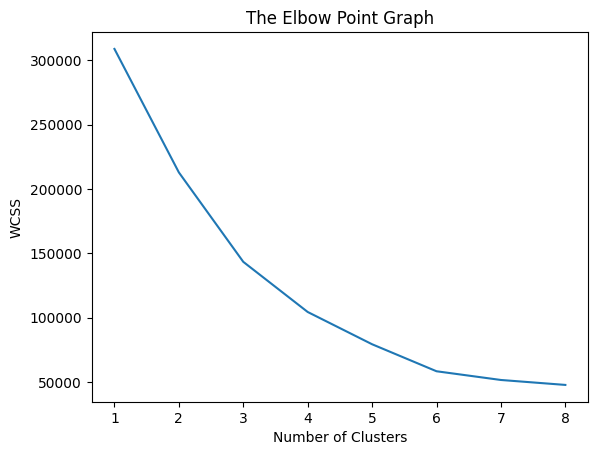

In [ ]:
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### **Apply KMeans Clustering on the data**

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(X) #here we start the clustering process where data will be divided into 6 clusters

KMeans(n_clusters=6)

In [ ]:
y = kmeans.predict(X) #it will tell us in which cluster which datapoint has been put

In [ ]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4,
       0, 4, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       3, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 1, 5, 1, 5, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [ ]:
final_df = pd.concat([customers, output], axis = 1)

In [ ]:
final_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
